
## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

In [1]:
# Dependencies
import openweathermapy.core as owm
from citipy import citipy
import requests
#config
from config import api_key
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np


In [2]:
api_key

'25bc90a1196e6f153eece0bc0b0fc9eb'

In [60]:

lat = np.random.uniform(-60,80,10)
lon = np.random.uniform(-180,180,50)


In [61]:
settings = {"units": "metric", "appid": api_key}
data = []
cities = []
for x in lat:
    for y in lon:
        city = citipy.nearest_city(x,y).city_name
        cities.append(city) 
        coordinates = (x,y)
        current_weather  = owm.get_current(coordinates, **settings)
        data.append(current_weather)
print(len(data))

500


In [62]:
data

[{'base': 'stations',
  'clouds': {'all': 92},
  'cod': 200,
  'coord': {'lat': 52.32, 'lon': -16.79},
  'dt': 1522571170,
  'id': 0,
  'main': {'grnd_level': 1014.59,
   'humidity': 100,
   'pressure': 1014.59,
   'sea_level': 1014.62,
   'temp': 8.09,
   'temp_max': 8.09,
   'temp_min': 8.09},
  'name': '',
  'rain': {'3h': 1.735},
  'sys': {'message': 0.0036, 'sunrise': 1522564868, 'sunset': 1522611705},
  'weather': [{'description': 'light rain',
    'icon': '10d',
    'id': 500,
    'main': 'Rain'}],
  'wind': {'deg': 86.5056, 'speed': 17.16}},
 {'base': 'stations',
  'clouds': {'all': 76},
  'cod': 200,
  'coord': {'lat': 52.32, 'lon': -6.03},
  'dt': 1522571170,
  'id': 2963226,
  'main': {'grnd_level': 1025.61,
   'humidity': 100,
   'pressure': 1025.61,
   'sea_level': 1025.8,
   'temp': 6.09,
   'temp_max': 6.09,
   'temp_min': 6.09},
  'name': 'Kilrane',
  'sys': {'country': 'IE',
   'message': 0.0032,
   'sunrise': 1522562289,
   'sunset': 1522609120},
  'weather': [{'descr

In [63]:
Temperature = []
Humidity = []
Cloudiness = [] 
Wind_Speed = []
Latitude = []
for i in range(len(data)):
    hum = data[i]['main']['humidity']
    temp = data[i]['main']['temp']* 1.8 + 32
    cloud = data[i]['clouds']['all']
    wind = data[i]['wind']['speed']
    lat =  data[i]['coord']['lat']
    Humidity.append(hum)
    Temperature.append(temp)
    Cloudiness.append(cloud)
    Wind_Speed.append(wind)
    Latitude.append(lat)
# Humidity 
# Temperature
# Cloudiness
# Wind_Speed
# Latitude

In [64]:
data_dic = {
    "City":cities,
    "Temperature":Temperature,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Speed,
    "Latitude":Latitude
}

data_df = pd.DataFrame(data_dic)
data_df.head()

,City,Cloudiness,Humidity,Latitude,Temperature,Wind Speed
0,dingle,92,100,52.32,46.562,17.16
1,wexford,76,100,52.32,42.962,5.56
2,droitwich,75,100,52.32,37.166,3.60
3,sotnikovo,20,30,52.32,26.600,11.00
4,beringovskiy,92,98,52.32,38.912,11.11


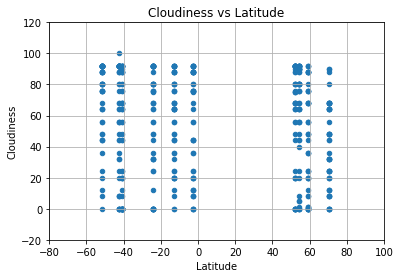

In [72]:
Cloudiness_fig = data_df.plot(x="Latitude",y="Cloudiness", kind= "scatter",xlim=(-80,100), ylim=(-20,120), title="Cloudiness vs Latitude")
Cloudiness_fig.grid()
Cloudiness_fig
plt.savefig("Cloudiness.png")

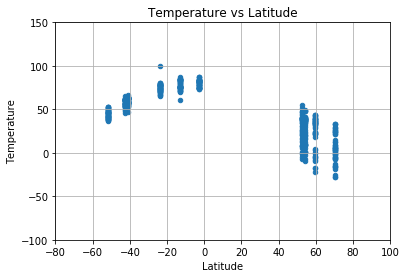

In [73]:
Temperature_fig = data_df.plot(x="Latitude",y="Temperature", kind= "scatter",xlim=(-80,100), ylim=(-100,150), title="Temperature vs Latitude")
Temperature_fig.grid()
Temperature_fig
plt.savefig("Temperature.png")

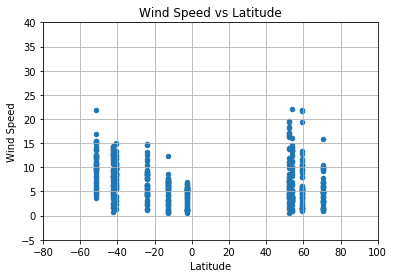

In [74]:
Wind_Speed_fig = data_df.plot(x="Latitude",y="Wind Speed", kind= "scatter",xlim=(-80,100), ylim=(-5,40), title="Wind Speed vs Latitude")
Wind_Speed_fig.grid()
Wind_Speed_fig
plt.savefig("Wind.png")

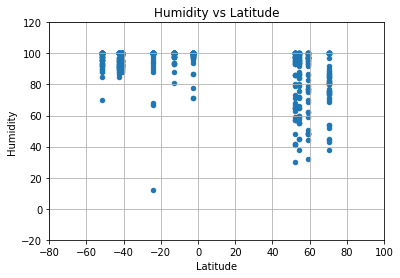

In [71]:
Humidity_fig = data_df.plot(x="Latitude",y="Humidity", kind= "scatter",xlim=(-80,100),ylim=(-20,120), title="Humidity vs Latitude")
Humidity_fig.grid()
Humidity_fig
plt.savefig("Humidity.png")

In [78]:
data_df.to_csv("WeatherPy.csv")

Observations:

Cloudiness rate is higher in  Southern Hemispheres.
Humidity is generally higher in the Northern Hemispheres. 
Highest temp ratios are in the cities which are closer to equator.